In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [17]:
pion_features_data = pd.read_pickle("new_combined_data_pion_ene_std.pkl")
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062..."
...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3...."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3...."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366..."


In [20]:
def features(df):
    return np.array(list(df.lay_energy) + list(df.totEne_std)  )

In [21]:
pion_features_data["features"] = pion_features_data.apply(features, axis=1)
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10...","[0.6774013042449951, 3.8306031227111816, 0.745..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53...","[2.0719006061553955, 2.016815185546875, 1.2768..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3...","[0.9237810969352722, 1.8481943607330322, 1.052..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681...","[1.3247671127319336, 1.2322539389133453, 1.167..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062...","[0.8254274129867554, 1.221725344657898, 1.0039..."
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877..."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276..."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157..."


In [22]:
pion_features_data.loc[(pion_features_data.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,20.0,19.872639
std,0.0,0.781677
min,20.0,1.048469
25%,20.0,19.842665
50%,20.0,19.964919
75%,20.0,20.090376
max,20.0,21.095812


In [6]:
pion_features_data.loc[(pion_features_data.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,50.0,49.771790
std,0.0,1.677904
min,50.0,0.080586
25%,50.0,49.628825
50%,50.0,49.925409
75%,50.0,50.234388
max,50.0,51.249313


In [7]:
pion_features_data.loc[(pion_features_data.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,100.0,99.504616
std,0.0,3.936173
min,100.0,0.118692
25%,100.0,99.279066
50%,100.0,99.858723
75%,100.0,100.475655
max,100.0,101.468369


In [8]:
pion_features_data.loc[(pion_features_data.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,200.0,198.947159
std,0.0,8.619056
min,200.0,0.114726
25%,200.0,198.573349
50%,200.0,199.755440
75%,200.0,200.999344
max,200.0,202.769089


In [9]:
pion_features_data.loc[(pion_features_data.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy
count,99505.0,99505.000000
mean,300.0,298.197784
std,0.0,15.282945
min,300.0,0.067563
25%,300.0,297.836914
50%,300.0,299.590942
75%,300.0,301.492371
max,300.0,304.126709


In [12]:
intr_resolution = np.array([0.781677/19.872637 , 1.677904/49.771793, 3.936173/99.504623, 8.619056/198.947144, 15.282945/298.197845])
intr_resolution

array([0.03933434, 0.03371195, 0.03955769, 0.04332335, 0.05125102])

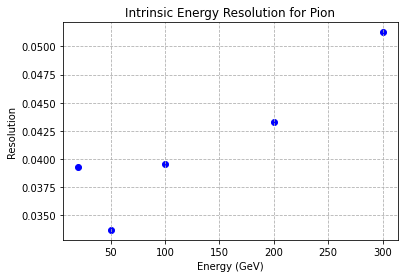

In [11]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, intr_resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Intrinsic Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [19]:
X_train = np.stack(pion_features_data.head(450000).features.values)
print(X_train.shape)
X_train

AttributeError: 'DataFrame' object has no attribute 'features'

In [13]:
from sklearn import preprocessing

In [14]:
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X

array([[-0.23689201, -0.22439289, -0.3157933 , ...,  3.67143182,
         0.74790068,  0.76549322],
       [-0.19681982, -0.26145643, -0.30866779, ...,  0.09014213,
        -0.08000327,  0.51885359],
       [-0.22981207, -0.26490208, -0.31168038, ..., -0.48964134,
        -0.50421107,  0.10857846],
       ...,
       [-0.20985017, -0.25599728, -0.30379631, ..., -0.45051153,
        -0.62394364, -0.35730373],
       [-0.16095831, -0.22046551, -0.27979207, ...,  2.10132126,
        -2.48309054, -2.10085727],
       [-0.22510118, -0.26162898, -0.25425635, ..., -0.48964134,
        -0.14960506, -0.3671555 ]])

In [15]:
print(sum(X[:,-1]))

-9.850026350122221e-11


In [16]:
Y = pion_features_data.head(450000).trueBeamEnergy.values
print(Y)
Y.shape

[302.02863   99.57724  199.08817  ...  99.85324   98.8405    49.406387]


(450000,)

In [7]:
from tensorflow.python import keras
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [18]:


    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 150,
              'batch_size': 32,
              'optimizer':"Adam",
              'activation':"relu",
              'lr': 0.0000597571,
              'units_per_layer': 1024,
              'num_hidden_layers': 2,
              'dropout': 0.231222,
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"[ene,std]input"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[84], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(params['units_per_layer'],activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu)
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-198
Epoch 1/150
11250/11250 [==============================] - 128s 11ms/step - loss: 1195.9805 - val_loss: 361.4655
Epoch 2/150
11250/11250 [==============================] - 121s 11ms/step - loss: 391.4706 - val_loss: 326.0744
Epoch 3/150
11250/11250 [==============================] - 124s 11ms/step - loss: 362.7412 - val_loss: 302.5169
Epoch 4/150
11250/11250 [==============================] - 124s 11ms/step - loss: 344.0723 - val_loss: 291.2799
Epoch 5/150
11250/11250 [==============================] - 112s 10ms/step - loss: 329.4173 - val_loss: 281.5124
Epoch 6/150
11250/11250 [==============================] - 114s 10ms/step - loss: 319.8103 - val_loss: 272.5113
Epoch 7/150
11250/11250 [==============================] - 125s 11ms/step - loss: 312.0284 - val_loss: 261.5695
Epoch 8/150
11250/11250 [==============================] - 128s 11ms/step - loss: 305.2768 - val_loss: 253.7971
Epoch 9/150
11250/11250 [======================

11250/11250 [==============================] - 104s 9ms/step - loss: 177.5156 - val_loss: 156.4866
Epoch 143/150
11250/11250 [==============================] - 104s 9ms/step - loss: 177.4031 - val_loss: 158.2159
Epoch 144/150
11250/11250 [==============================] - 104s 9ms/step - loss: 177.1737 - val_loss: 156.1283
Epoch 145/150
11250/11250 [==============================] - 104s 9ms/step - loss: 176.6689 - val_loss: 157.4150
Epoch 146/150
11250/11250 [==============================] - 104s 9ms/step - loss: 176.1028 - val_loss: 157.6025
Epoch 147/150
11250/11250 [==============================] - 105s 9ms/step - loss: 175.9263 - val_loss: 160.2053
Epoch 148/150
11250/11250 [==============================] - 104s 9ms/step - loss: 176.0199 - val_loss: 159.1430
Epoch 149/150
11250/11250 [==============================] - 104s 9ms/step - loss: 175.8193 - val_loss: 154.3174
Epoch 150/150
11250/11250 [==============================] - 105s 9ms/step - loss: 174.9921 - val_loss: 157.39

2021-02-02 20:40:29.711188: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-02 20:40:29.840704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-02 20:40:29.841748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-02-02 20:40:29.842887: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nitish/Root/lib:/home/nitish/Root/lib/:
2021-02-02 20:40:29.843612: W tensorflow/stream_executor/platfor

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

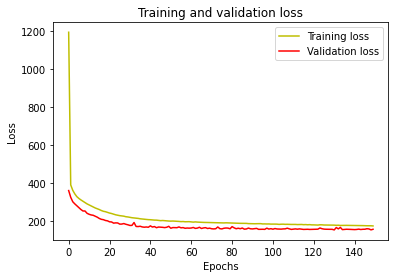

In [19]:
l = history.history['loss']
vl = history.history['val_loss']

epochs = range( len(l) )
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
units_per_lay=[256, 512, 1024]

b_size = [32, 64, 128]

np.random.randint(4)

3

In [21]:
lr = np.exp(-np.random.uniform(6.5, 10, 5))
dropout = np.random.uniform(0.2, 0.5, 5)

units_per_layer = [units_per_lay[np.random.randint(3)] for i in range(5)]
batch_size = [b_size[np.random.randint(3)] for i in range(5)]

print(lr)
print(dropout)
print(units_per_layer)
print(batch_size)

[0.00069263 0.00026926 0.00062205 0.00129037 0.00010334]
[0.2292159  0.40658723 0.49792634 0.37995348 0.24413446]
[256, 512, 512, 1024, 512]
[128, 32, 64, 128, 64]


In [40]:
train_loss=[]
val_loss=[]

for i in range(5):

    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': batch_size[i],
              'optimizer':"adam",
              'activation':"relu",
              'lr': lr[i],
              'units_per_layer': units_per_layer[i],
              'num_hidden_layers': 2,
              'dropout': dropout[i],
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"[ene,std]input"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[84], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(params['units_per_layer'],activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu)
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])
    
    l = history.history['loss']
    vl = history.history['val_loss']
    train_loss.append(l)
    val_loss.append(vl)
    
    print(i+1)

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-188
Epoch 1/50
2813/2813 [==============================] - 17s 6ms/step - loss: 1257.9497 - val_loss: 371.3302
Epoch 2/50
2813/2813 [==============================] - 16s 6ms/step - loss: 534.5345 - val_loss: 367.1049
Epoch 3/50
2813/2813 [==============================] - 16s 6ms/step - loss: 505.4809 - val_loss: 347.2099
Epoch 4/50
2813/2813 [==============================] - 16s 6ms/step - loss: 487.2541 - val_loss: 328.6808
Epoch 5/50
2813/2813 [==============================] - 16s 6ms/step - loss: 474.9781 - val_loss: 310.2931
Epoch 6/50
2813/2813 [==============================] - 16s 6ms/step - loss: 464.9832 - val_loss: 294.3867
Epoch 7/50
2813/2813 [==============================] - 16s 6ms/step - loss: 457.5447 - val_loss: 289.7750
Epoch 8/50
2813/2813 [==============================] - 16s 6ms/step - loss: 449.4073 - val_loss: 287.1107
Epoch 9/50
2813/2813 [==============================] - 16s 6ms/step - loss: 444.4086 -

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-189
Epoch 1/50
11250/11250 [==============================] - 35s 3ms/step - loss: 743.0019 - val_loss: 336.0460
Epoch 2/50
11250/11250 [==============================] - 33s 3ms/step - loss: 499.8315 - val_loss: 319.7117
Epoch 3/50
11250/11250 [==============================] - 33s 3ms/step - loss: 475.2768 - val_loss: 305.7599
Epoch 4/50
11250/11250 [==============================] - 33s 3ms/step - loss: 459.6358 - val_loss: 295.2358
Epoch 5/50
11250/11250 [==============================] - 33s 3ms/step - loss: 450.2169 - val_loss: 297.6947
Epoch 6/50
11250/11250 [==============================] - 33s 3ms/step - loss: 440.1612 - val_loss: 283.2102
Epoch 7/50
11250/11250 [==============================] - 34s 3ms/step - loss: 432.3670 - val_loss: 280.7209
Epoch 8/50
11250/11250 [==============================] - 33s 3ms/step - loss: 427.3106 - val_loss: 276.5715
Epoch 9/50
11250/11250 [==============================] - 33s 3ms/step -

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-190
Epoch 1/50
11250/11250 [==============================] - 110s 10ms/step - loss: 1198.3522 - val_loss: 361.1526
Epoch 2/50
11250/11250 [==============================] - 109s 10ms/step - loss: 391.3390 - val_loss: 320.3971
Epoch 3/50
11250/11250 [==============================] - 108s 10ms/step - loss: 362.1700 - val_loss: 301.9713
Epoch 4/50
11250/11250 [==============================] - 109s 10ms/step - loss: 344.7297 - val_loss: 290.5869
Epoch 5/50
11250/11250 [==============================] - 109s 10ms/step - loss: 330.1447 - val_loss: 276.8770
Epoch 6/50
11250/11250 [==============================] - 109s 10ms/step - loss: 318.6507 - val_loss: 272.4943
Epoch 7/50
11250/11250 [==============================] - 108s 10ms/step - loss: 309.9953 - val_loss: 257.9019
Epoch 8/50
11250/11250 [==============================] - 117s 10ms/step - loss: 302.3784 - val_loss: 254.7939
Epoch 9/50
11250/11250 [==============================]

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-191
Epoch 1/50
2813/2813 [==============================] - 16s 6ms/step - loss: 1156.1766 - val_loss: 359.0948
Epoch 2/50
2813/2813 [==============================] - 15s 5ms/step - loss: 434.5844 - val_loss: 316.7099
Epoch 3/50
2813/2813 [==============================] - 15s 5ms/step - loss: 403.4874 - val_loss: 297.0059
Epoch 4/50
2813/2813 [==============================] - 15s 5ms/step - loss: 384.9467 - val_loss: 293.5131
Epoch 5/50
2813/2813 [==============================] - 15s 5ms/step - loss: 370.9847 - val_loss: 290.1887
Epoch 6/50
2813/2813 [==============================] - 15s 5ms/step - loss: 364.3415 - val_loss: 270.8354
Epoch 7/50
2813/2813 [==============================] - 15s 5ms/step - loss: 356.8383 - val_loss: 271.3127
Epoch 8/50
2813/2813 [==============================] - 15s 5ms/step - loss: 351.1584 - val_loss: 256.3149
Epoch 9/50
2813/2813 [==============================] - 15s 5ms/step - loss: 342.7417 -

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-192
Epoch 1/50
5625/5625 [==============================] - 65s 12ms/step - loss: 720.9544 - val_loss: 321.6714
Epoch 2/50
5625/5625 [==============================] - 63s 11ms/step - loss: 352.6581 - val_loss: 292.4347
Epoch 3/50
5625/5625 [==============================] - 63s 11ms/step - loss: 325.7892 - val_loss: 272.8546
Epoch 4/50
5625/5625 [==============================] - 64s 11ms/step - loss: 309.4988 - val_loss: 258.7281
Epoch 5/50
5625/5625 [==============================] - 65s 12ms/step - loss: 292.6795 - val_loss: 241.6377
Epoch 6/50
5625/5625 [==============================] - 64s 11ms/step - loss: 279.5335 - val_loss: 227.0158
Epoch 7/50
5625/5625 [==============================] - 64s 11ms/step - loss: 268.0516 - val_loss: 214.0000
Epoch 8/50
5625/5625 [==============================] - 64s 11ms/step - loss: 257.0935 - val_loss: 210.3013
Epoch 9/50
5625/5625 [==============================] - 64s 11ms/step - loss: 24

In [ ]:
n=0
l = train_loss[n-1]
vl = val_loss[n-1]

l = history.history['loss']
vl = history.history['val_loss']

epochs = range(1, len(l) + 1)
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
x_test_set = pion_features_data.tail(497521-450000)
x_test_set

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367...","[0.9292487502098083, 1.4994680881500244, 1.325..."
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892...","[1.0738681554794312, 1.0422312021255493, 0.782..."
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475...","[1.190887212753296, 0.9109857678413391, 8.9380..."
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5...","[5.315865874290466, 17.029596507549286, 0.9630..."
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2....","[17.302144557237625, 20.476891815662384, 63.49..."
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877..."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276..."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157..."


In [23]:
X_test = np.stack(pion_features_data.tail(497521-450000).features.values)
X_test.shape

(47521, 84)

In [24]:
X_test = preprocessing.StandardScaler().fit(X_train).transform(X_test)
X_test

array([[-0.22965495, -0.27202807, -0.30802151, ..., -0.32225404,
         0.18935929,  0.61707159],
       [-0.22549918, -0.28137139, -0.31529773, ..., -0.45983324,
         0.36511813,  1.14085352],
       [-0.22213653, -0.2840533 , -0.20596047, ...,  0.43831912,
         1.5478374 ,  0.93150918],
       ...,
       [-0.23491233, -0.28260153, -0.30867356, ..., -0.48964134,
        -0.55732449,  0.34637551],
       [-0.23121007, -0.28539236, -0.31026548, ..., -0.30311336,
         0.71991601,  0.41816252],
       [-0.21286162, -0.27695209, -0.30361101, ..., -0.43913   ,
         0.56912816,  0.9353299 ]])

In [25]:
x_test_set["predicted_energy"] = model.predict(X_test)
x_test_set

<ipython-input-25-ef7fa7c5f07b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_set["predicted_energy"] = model.predict(X_test)


,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features,predicted_energy
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367...","[0.9292487502098083, 1.4994680881500244, 1.325...",19.642086
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892...","[1.0738681554794312, 1.0422312021255493, 0.782...",100.490776
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475...","[1.190887212753296, 0.9109857678413391, 8.9380...",298.729065
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5...","[5.315865874290466, 17.029596507549286, 0.9630...",99.874390
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2....","[17.302144557237625, 20.476891815662384, 63.49...",20.876381
...,...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877...",49.885498
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946...",302.354767
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276...",100.266884
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157...",49.173409


2021-02-03 07:24:20.037636: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 15967056 exceeds 10% of free system memory.


In [26]:
x_test_set.loc[(x_test_set.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9424.0,9424.000000,9424.000000
mean,20.0,19.876648,21.952108
std,0.0,0.761921,9.775037
min,20.0,2.639390,0.000000
25%,20.0,19.842844,19.853225
50%,20.0,19.966789,20.361512
75%,20.0,20.091725,20.863163
max,20.0,21.095812,150.255325


In [27]:
x_test_set.loc[(x_test_set.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9493.0,9493.000000,9493.000000
mean,50.0,49.782413,50.650066
std,0.0,1.594328,6.771851
min,50.0,18.020077,18.168934
25%,50.0,49.628960,49.128838
50%,50.0,49.934292,49.910324
75%,50.0,50.241192,50.559448
max,50.0,50.966721,149.934494


In [28]:
x_test_set.loc[(x_test_set.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,100.0,99.514053,99.582130
std,0.0,3.648157,5.704419
min,100.0,2.033318,16.148251
25%,100.0,99.278406,99.544146
50%,100.0,99.853195,100.090733
75%,100.0,100.473116,100.490242
max,100.0,101.392853,201.791611


In [29]:
x_test_set.loc[(x_test_set.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9512.0,9512.000000,9512.000000
mean,200.0,198.937271,198.069122
std,0.0,9.207854,17.048239
min,200.0,0.114726,8.477636
25%,200.0,198.600941,198.353230
50%,200.0,199.756813,199.872894
75%,200.0,201.011787,201.397865
max,200.0,202.454834,291.304626


In [30]:
x_test_set.loc[(x_test_set.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,300.0,297.819153,293.456665
std,0.0,18.115940,30.061296
min,300.0,1.008143,12.945782
25%,300.0,297.810028,297.066467
50%,300.0,299.584732,298.464264
75%,300.0,301.471245,299.901054
max,300.0,303.580872,341.860657


In [31]:
x_test_means = np.array([22.784109, 51.891449, 101.011993, 197.503555, 294.553650])
x_test_stds = np.array([10.859448, 8.626386, 10.710754, 21.374369, 34.456547])

resolution = x_test_stds/x_test_means
resolution

array([0.47662377, 0.16623907, 0.10603448, 0.10822271, 0.11697885])

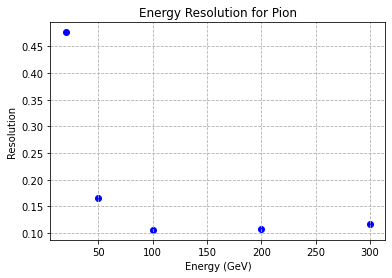

In [32]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [10]:
energy=[20, 50, 100, 200, 300]
pred_energy_pion = []

#for i in energy:
#    pred_energy_pion.append(x_test_set.loc[x_test_set.beamEnergy==i].predicted_energy.values)
    
#pred_energy_pion

In [34]:
%jsroot on
c = ROOT.TCanvas()

H_pion_pred_20 = ROOT.TH1F("H_pion_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_50 = ROOT.TH1F("H_pion_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_100 = ROOT.TH1F("H_pion_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_200 = ROOT.TH1F("H_pion_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_300 = ROOT.TH1F("H_pion_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_pion[0].size):
    H_pion_pred_20.Fill(pred_energy_pion[0][i])
    
for i in range(pred_energy_pion[1].size):
    H_pion_pred_50.Fill(pred_energy_pion[1][i])
    
for i in range(pred_energy_pion[2].size):
    H_pion_pred_100.Fill(pred_energy_pion[2][i])
    
for i in range(pred_energy_pion[3].size):
    H_pion_pred_200.Fill(pred_energy_pion[3][i])
    
for i in range(pred_energy_pion[4].size):
    H_pion_pred_300.Fill(pred_energy_pion[4][i])
    


H_pion_pred_20.SetLineColor(1)
H_pion_pred_50.SetLineColor(2)
H_pion_pred_100.SetLineColor(3)
H_pion_pred_200.SetLineColor(4)
H_pion_pred_300.SetLineColor(5)




H_pion_pred_20.Draw()
H_pion_pred_50.Draw('same')
H_pion_pred_100.Draw('same')
H_pion_pred_200.Draw('same')
H_pion_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

In [2]:
pion_means = []
pion_stds = []

pion_means.append(H_pion_pred_20.GetMean())
pion_means.append(H_pion_pred_50.GetMean())
pion_means.append(H_pion_pred_100.GetMean())
pion_means.append(H_pion_pred_200.GetMean())
pion_means.append(H_pion_pred_300.GetMean())

pion_stds.append(H_pion_pred_20.GetStdDev())
pion_stds.append(H_pion_pred_50.GetStdDev())
pion_stds.append(H_pion_pred_100.GetStdDev())
pion_stds.append(H_pion_pred_200.GetStdDev())
pion_stds.append(H_pion_pred_300.GetStdDev())

print(pion_means)
pion_stds



NameError: name 'H_pion_pred_20' is not defined

In [3]:
pion_means = [21.952109376800284, 50.650064673122884, 99.58212934878046, 198.06912134734395, 293.4566522001246]

pion_stds = [9.77451844902537,
 6.771494474249633,
 5.704120252019773,
 17.047341895923,
 30.05972148437259]

In [4]:
#for noemal equation
mean_ne = [17.2850781998911, 45.22257179115259, 93.4851491359478, 192.47197039519313, 293.6494407575138]

std_ne = [5.844814967813348,
 10.826584570065949,
 18.538464133416028,
 33.86404941053829,
 47.147552259907265]



In [5]:
#for NN with one hidden layer and without std_dev
x_test_means = np.array([22.784109, 51.891449, 101.011993, 197.503555, 294.553650])
x_test_stds = np.array([10.859448, 8.626386, 10.710754, 21.374369, 34.456547])

resolution = x_test_stds/x_test_means
resolution

array([0.47662377, 0.16623907, 0.10603448, 0.10822271, 0.11697885])

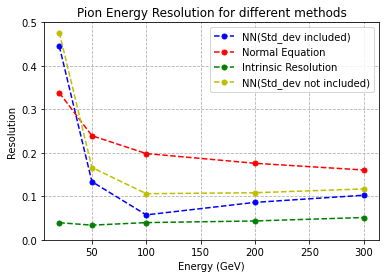

In [14]:
plt.plot(energy, (pion_stds)/np.array(pion_means), "b.", label="NN(Std_dev included)",  linestyle="--", color="b", markersize=10)
plt.plot(energy, np.array(std_ne)/np.array(mean_ne), "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)
plt.plot(energy, intr_resolution, "g.", label="Intrinsic Resolution",  linestyle="--", color="g", markersize=10)
plt.plot(energy, resolution, "y.", label="NN(Std_dev not included)",  linestyle="--", color="y", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

plt.ylim([0,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [8]:
true_beamEnergy_mean =np.array([19.872637, 49.771793, 99.504623, 198.947144, 298.197845])

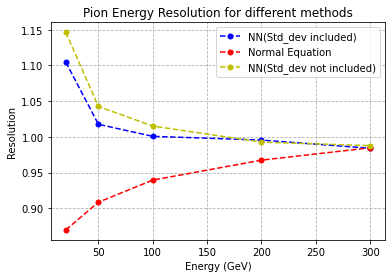

In [16]:
plt.plot(energy, np.array(pion_means)/true_beamEnergy_mean, "b.", label="NN(Std_dev included)",  linestyle="--", color="b", markersize=10)
plt.plot(energy, mean_ne/true_beamEnergy_mean, "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)
plt.plot(energy, x_test_means/true_beamEnergy_mean, "r.", label="NN(Std_dev not included)",  linestyle="--", color="y", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

#plt.ylim([0.5,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [41]:
#model.save("models/model_01.h5")

In [53]:
plot_model(model, show_shapes=False, show_layer_names=False)

TypeError: 'InputLayer' object is not iterable

In [48]:
weights = model.get_weights()
weights

[array([[ 0.0071769 , -0.04376879, -0.00682947, ..., -0.00362699,
         -0.0324735 ,  0.04704593],
        [ 0.00510297, -0.04145669,  0.01186476, ..., -0.01683946,
         -0.00495137,  0.04576418],
        [ 0.04365406,  0.00596867, -0.00732973, ...,  0.00662356,
          0.01410922,  0.02335544],
        ...,
        [-0.04997856, -0.05801408, -0.05701816, ..., -0.1493402 ,
          0.00676672,  0.10131235],
        [ 0.15397947,  0.01144916,  0.07911256, ...,  0.01754367,
         -0.03947487,  0.23806387],
        [ 0.23556858,  0.05223192,  0.05430348, ...,  0.02489049,
         -0.03427257,  0.22138803]], dtype=float32),
 array([ 0.3486379 ,  0.1555366 ,  0.36692226, ...,  0.15864609,
        -0.40544894, -0.18289186], dtype=float32),
 array([[-0.19635206, -0.0180902 , -0.00993086, ..., -0.03333992,
         -0.08042356,  0.0018072 ],
        [-0.04953605,  0.04924749, -0.01506367, ...,  0.05226254,
         -0.00277478,  0.12639031],
        [-0.05961944, -0.00036148,  0.

In [49]:
len(weights)

6

In [51]:
for i in range(6):
    print(weights[i].shape)

(84, 1024)
(1024,)
(1024, 1024)
(1024,)
(1024, 1)
(1,)
